# CPD using TIRE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

## Set parameters

In [2]:
window_size = 20
domain = "TD" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=3 #h^TD in paper
nr_shared_TD=2 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

## Generate data

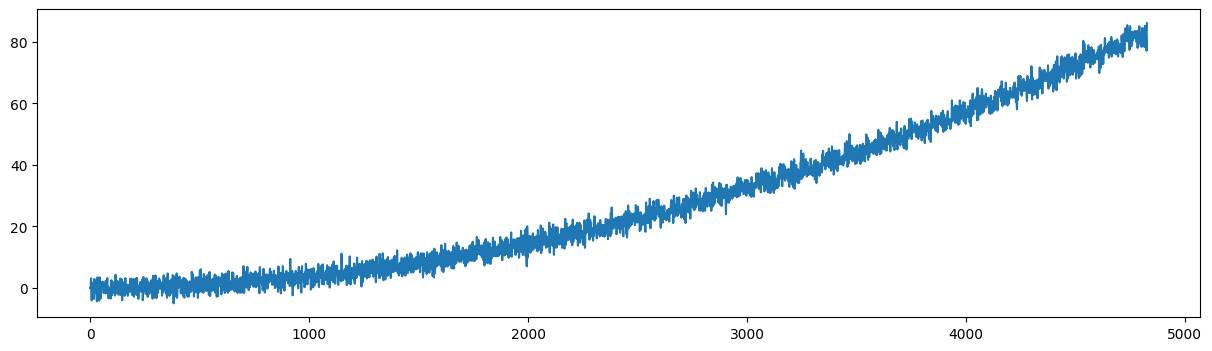

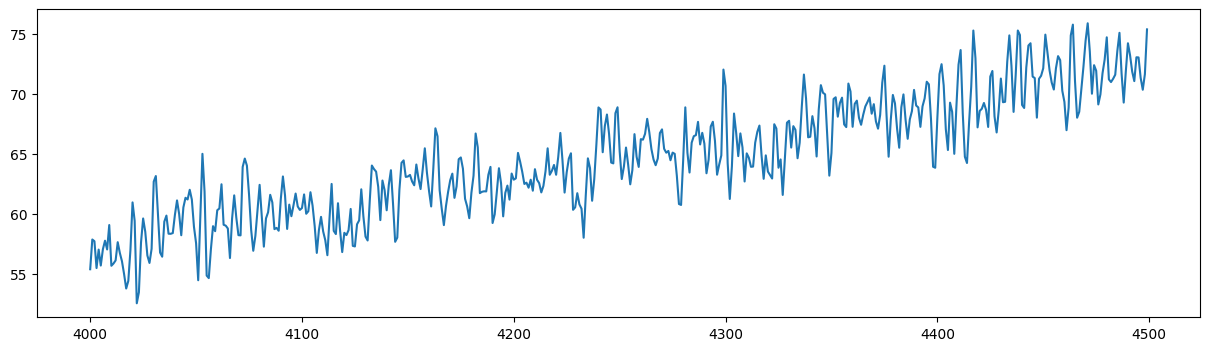

In [3]:
timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

plt.figure(figsize=(15,4))
plt.plot(timeseries)
plt.show()
plt.figure(figsize=(15,4))
plt.plot(range(4000,4500),timeseries[4000:4500])
plt.show()

## Train the autoencoders

In [4]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3, 20)]              0         []                            
                                                                                                  
 dense (Dense)               (None, 3, 2)                 42        ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 3, 1)                 21        ['input_1[0][0]']             
                                                                                                  
 tf.concat (TFOpLambda)      (None, 3, 3)                 0         ['dense[0][0]',               
                                                                     'dense_1[0][0]']         

## Postprocessing and peak detection

In [5]:
#we calculate the smoothened dissimilarity measure and the corresponding prominence-based change point scores
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

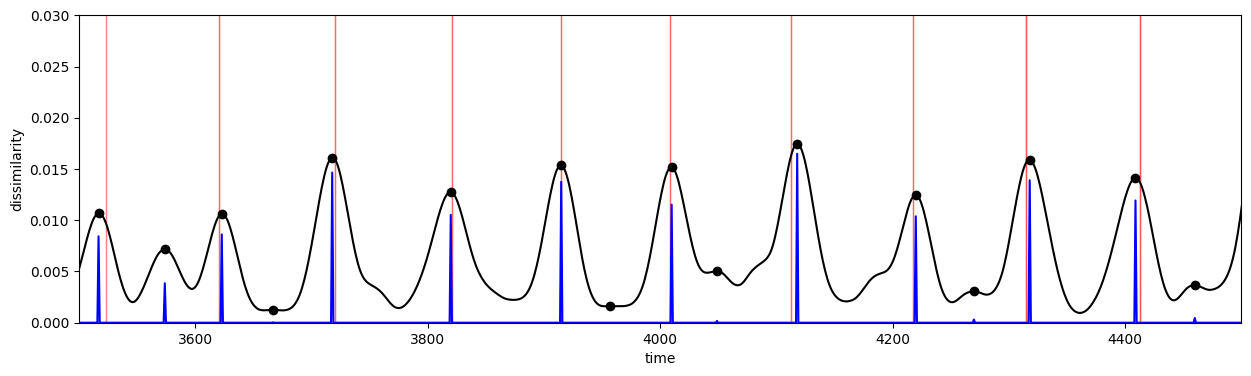

[0.6562958641845076, 0.8709904494805203, 0.9061727000815494]


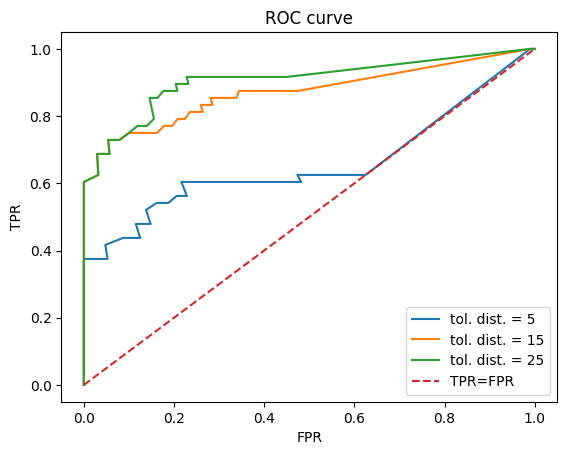

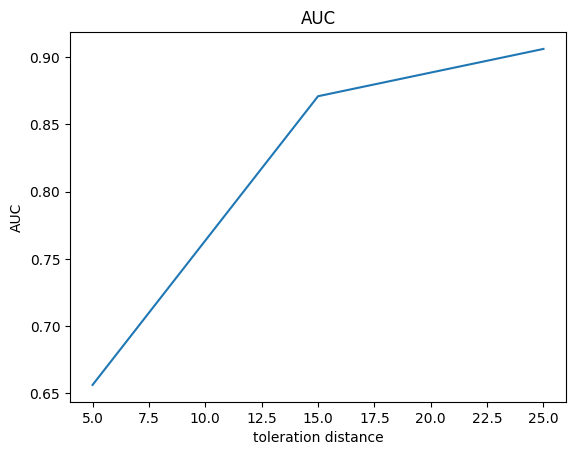

In [6]:
#parameters for plot
time_start = 3500
time_stop = 4500
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 3, 2)                 42        ['input_5[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 3, 1)                 21        ['input_5[0][0]']             
                                                                                                  
 tf.concat_2 (TFOpLambda)    (None, 3, 3)                 0         ['dense_8[0][0]',             
                                                                     'dense_9[0][0]']       

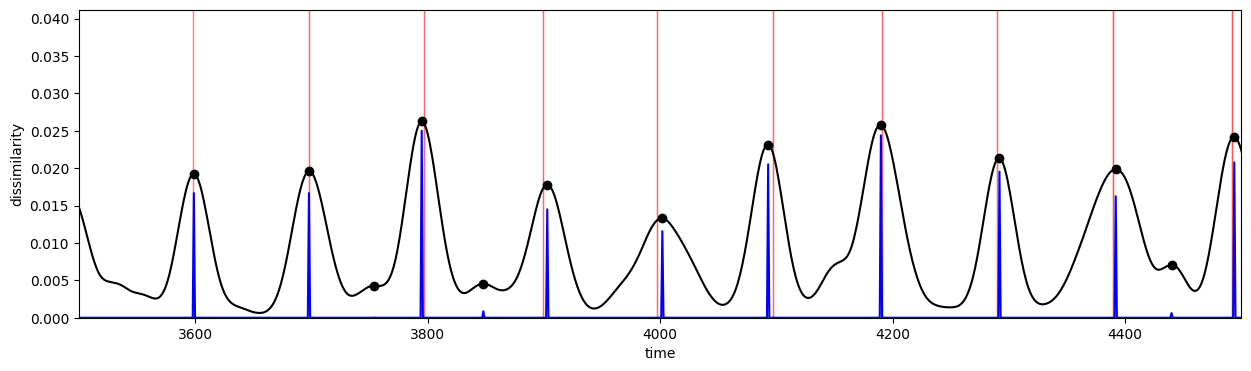

[0.6705026024236302, 0.9274106338118377, 0.9531991503259697]


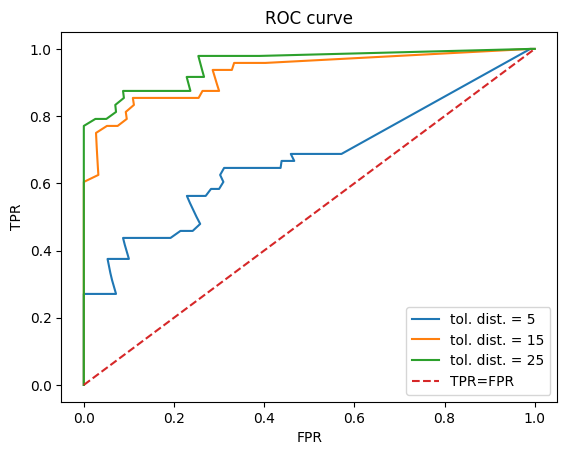

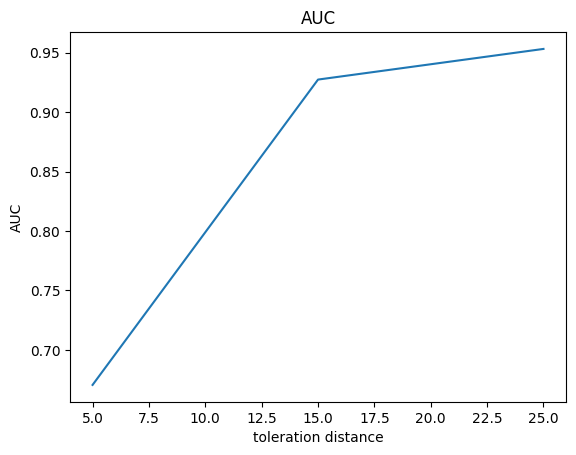

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 3, 2)                 42        ['input_9[0][0]']             
                                                                                                  
 dense_17 (Dense)            (None, 3, 1)                 21        ['input_9[0][0]']             
                                                                                                  
 tf.concat_4 (TFOpLambda)    (None, 3, 3)                 0         ['dense_16[0][0]',            
                                                                     'dense_17[0][0]']     

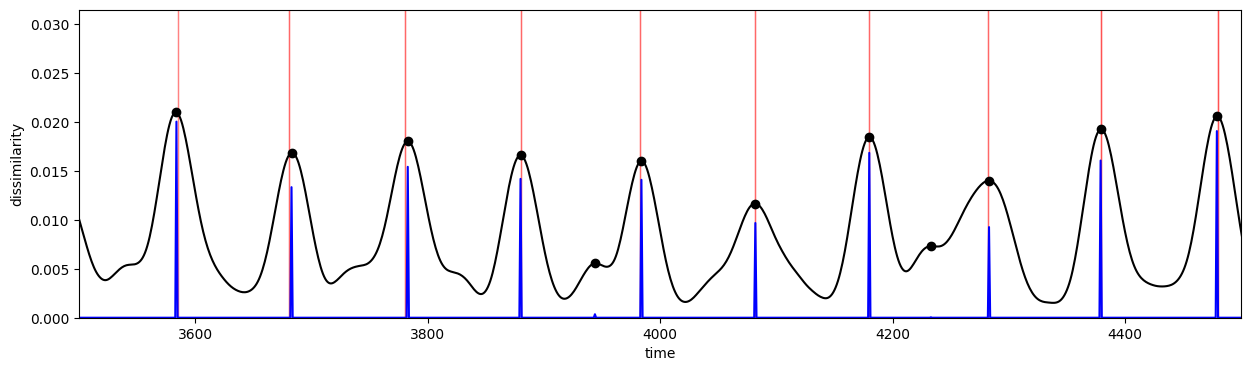

[0.7035845898170787, 0.9309499992237125, 0.9698069312842822]


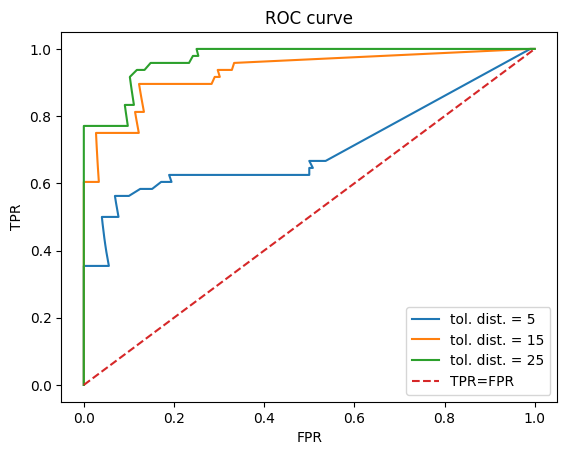

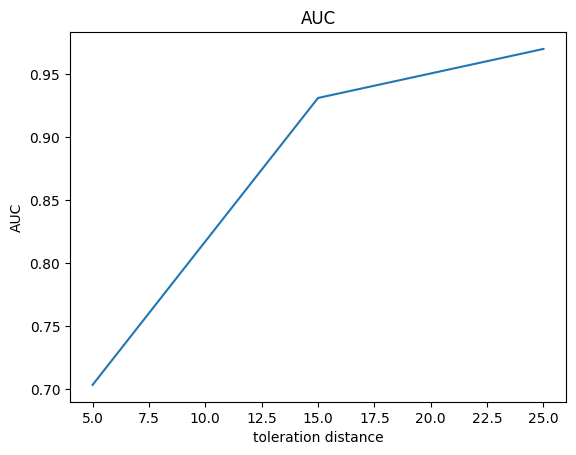

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_24 (Dense)            (None, 3, 2)                 42        ['input_13[0][0]']            
                                                                                                  
 dense_25 (Dense)            (None, 3, 1)                 21        ['input_13[0][0]']            
                                                                                                  
 tf.concat_6 (TFOpLambda)    (None, 3, 3)                 0         ['dense_24[0][0]',            
                                                                     'dense_25[0][0]']     

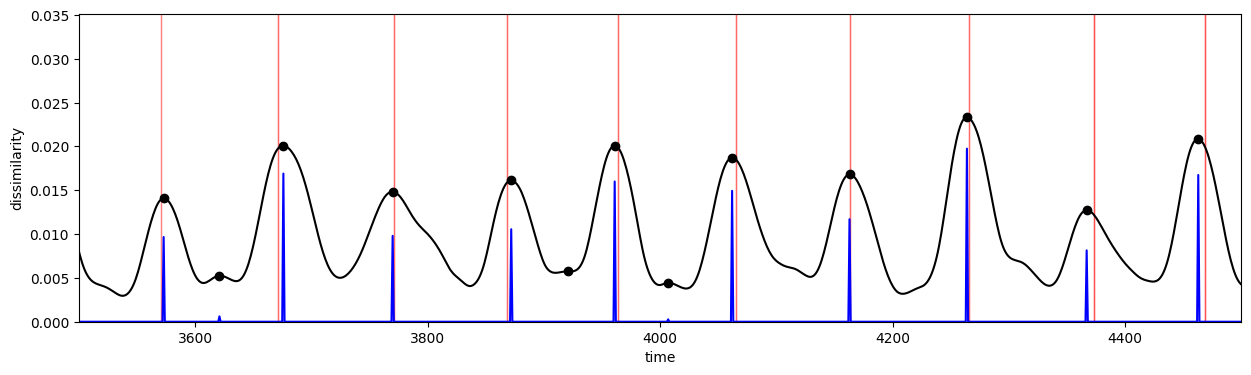

[0.506566124944947, 0.8563237582259422, 0.9108637459362273]


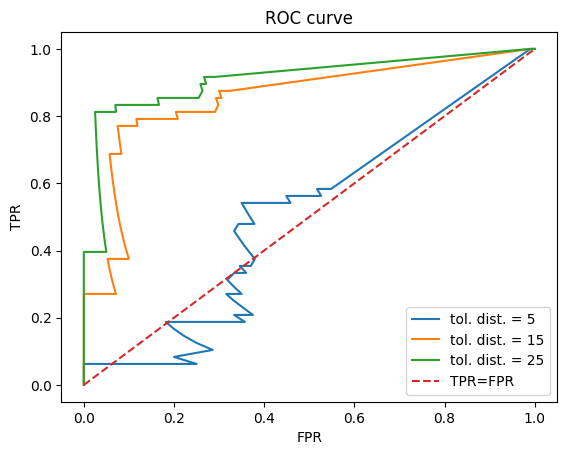

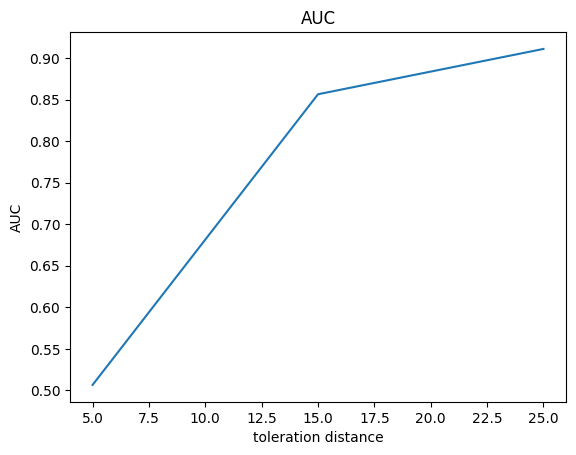

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_32 (Dense)            (None, 3, 2)                 42        ['input_17[0][0]']            
                                                                                                  
 dense_33 (Dense)            (None, 3, 1)                 21        ['input_17[0][0]']            
                                                                                                  
 tf.concat_8 (TFOpLambda)    (None, 3, 3)                 0         ['dense_32[0][0]',            
                                                                     'dense_33[0][0]']     

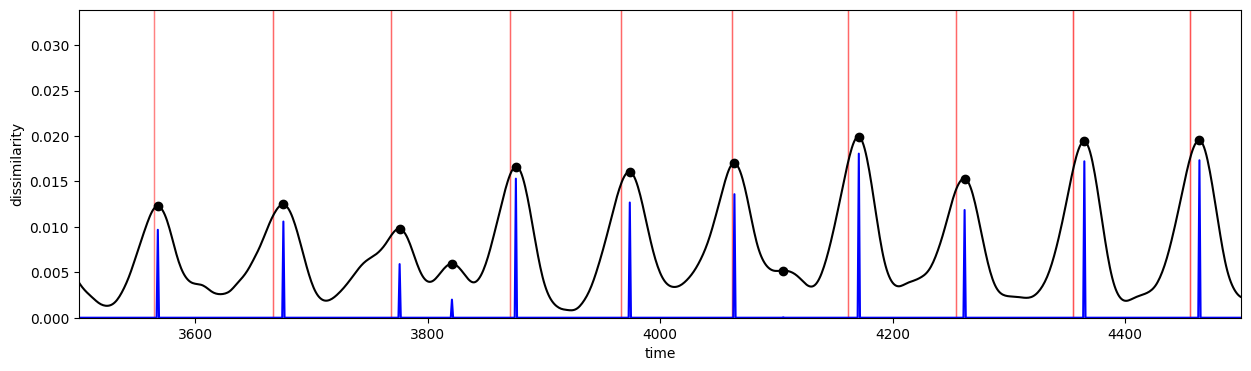

[0.38938878482321876, 0.894777523721398, 0.9448532872702194]


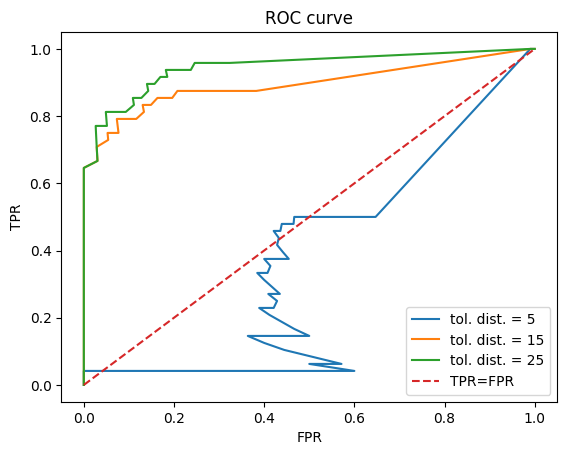

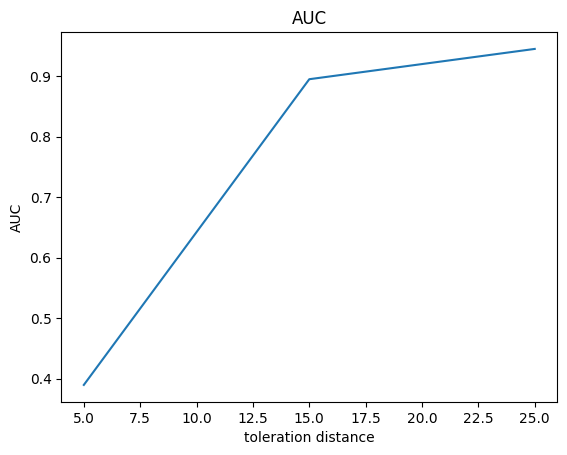

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_40 (Dense)            (None, 3, 2)                 42        ['input_21[0][0]']            
                                                                                                  
 dense_41 (Dense)            (None, 3, 1)                 21        ['input_21[0][0]']            
                                                                                                  
 tf.concat_10 (TFOpLambda)   (None, 3, 3)                 0         ['dense_40[0][0]',            
                                                                     'dense_41[0][0]']     

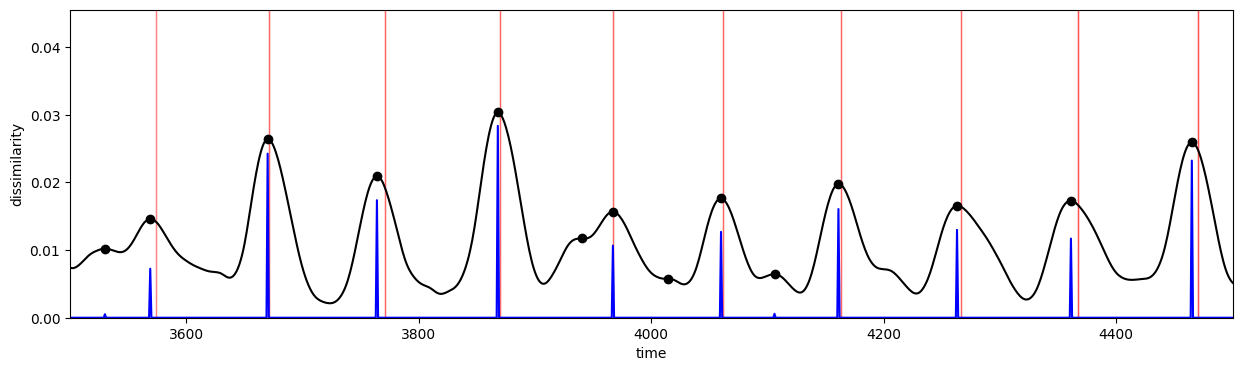

[0.4671725163481746, 0.8229952835217514, 0.8521665284669527]


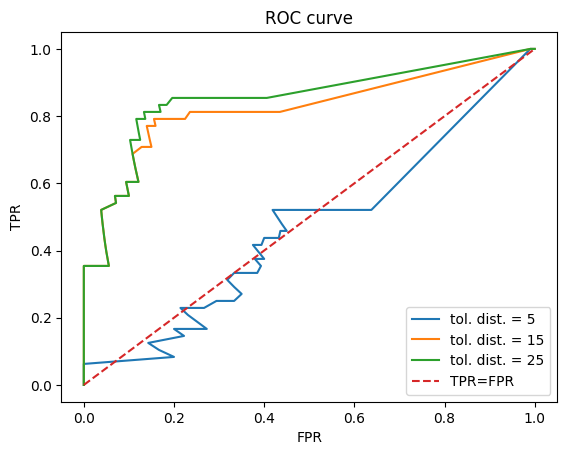

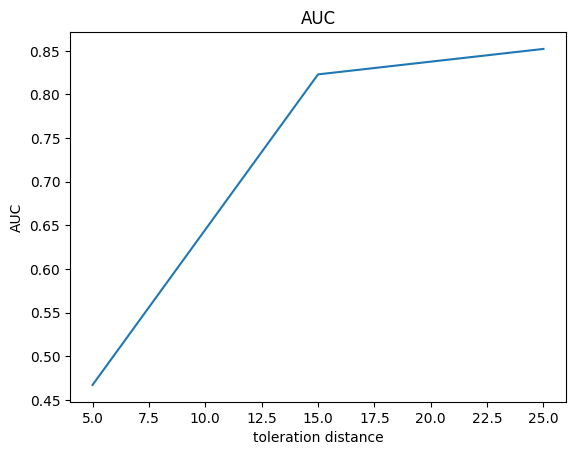

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_48 (Dense)            (None, 3, 2)                 42        ['input_25[0][0]']            
                                                                                                  
 dense_49 (Dense)            (None, 3, 1)                 21        ['input_25[0][0]']            
                                                                                                  
 tf.concat_12 (TFOpLambda)   (None, 3, 3)                 0         ['dense_48[0][0]',            
                                                                     'dense_49[0][0]']     

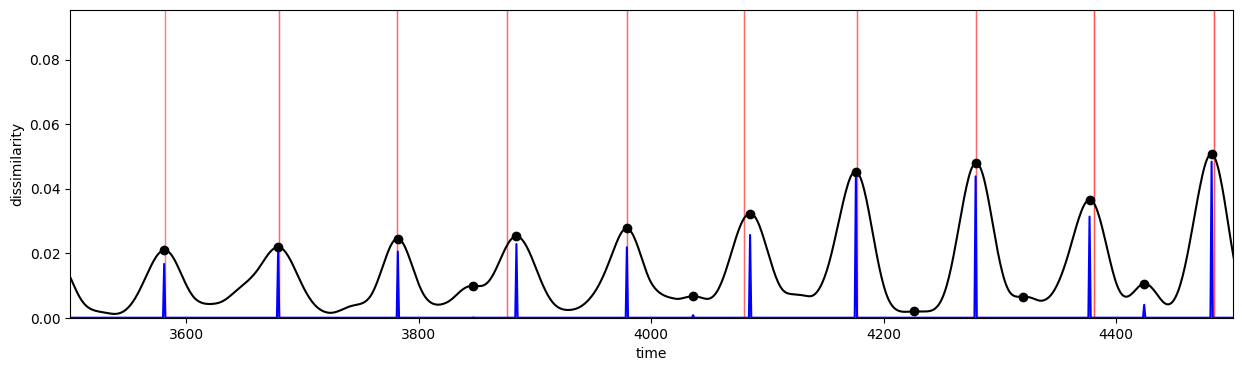

[0.5202249459810011, 0.8196899220576737, 0.8592124754840811]


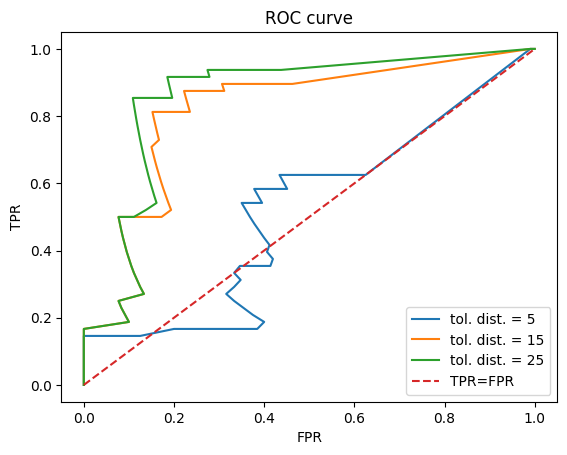

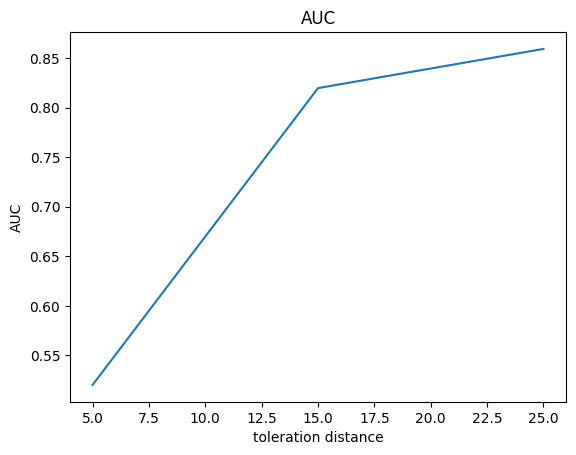

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_56 (Dense)            (None, 3, 2)                 42        ['input_29[0][0]']            
                                                                                                  
 dense_57 (Dense)            (None, 3, 1)                 21        ['input_29[0][0]']            
                                                                                                  
 tf.concat_14 (TFOpLambda)   (None, 3, 3)                 0         ['dense_56[0][0]',            
                                                                     'dense_57[0][0]']     

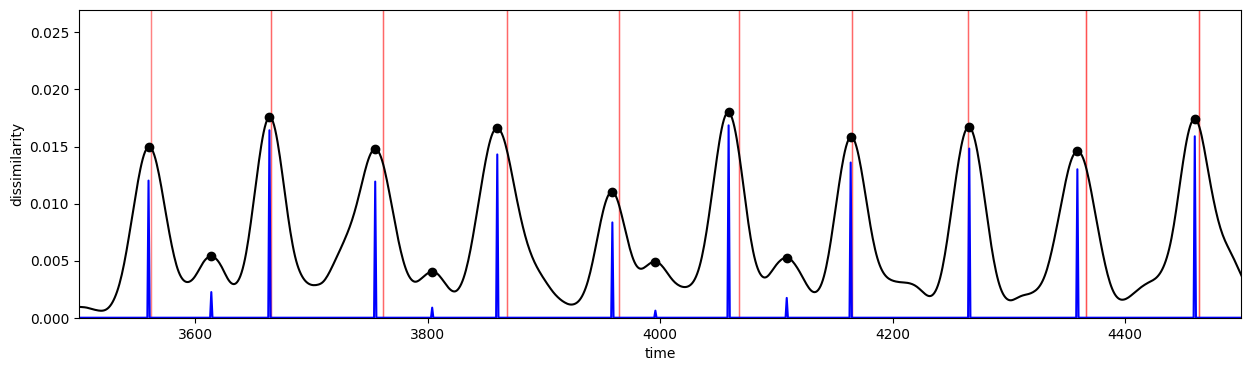

[0.35953330421545726, 0.8960175349238803, 0.9414557496394933]


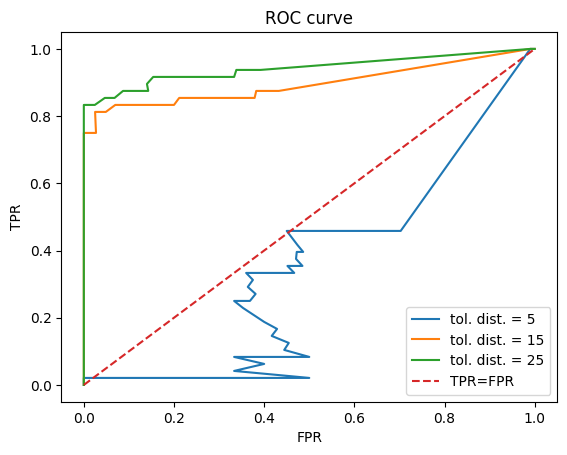

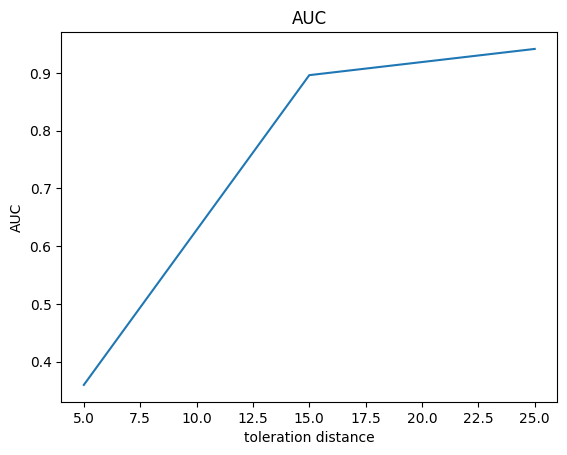

Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_64 (Dense)            (None, 3, 2)                 42        ['input_33[0][0]']            
                                                                                                  
 dense_65 (Dense)            (None, 3, 1)                 21        ['input_33[0][0]']            
                                                                                                  
 tf.concat_16 (TFOpLambda)   (None, 3, 3)                 0         ['dense_64[0][0]',            
                                                                     'dense_65[0][0]']     

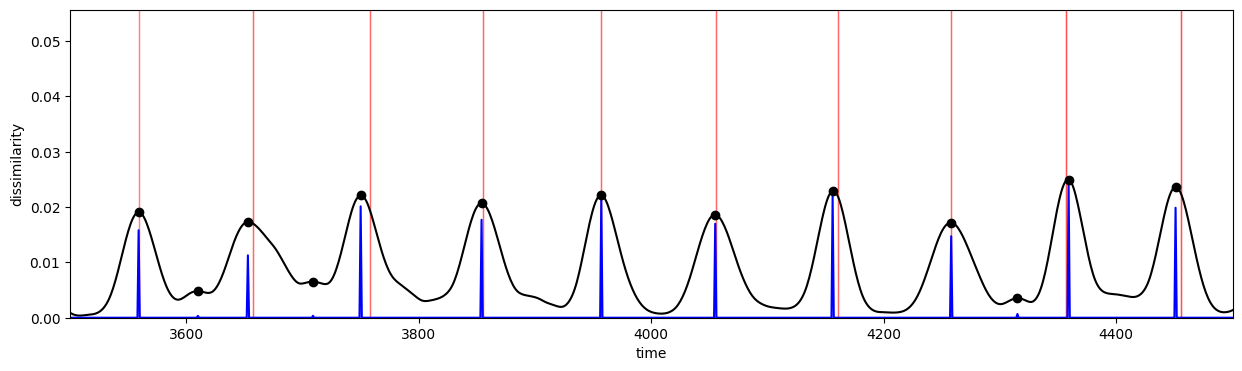

[0.6379858656423029, 0.9331666489238017, 0.960013297079953]


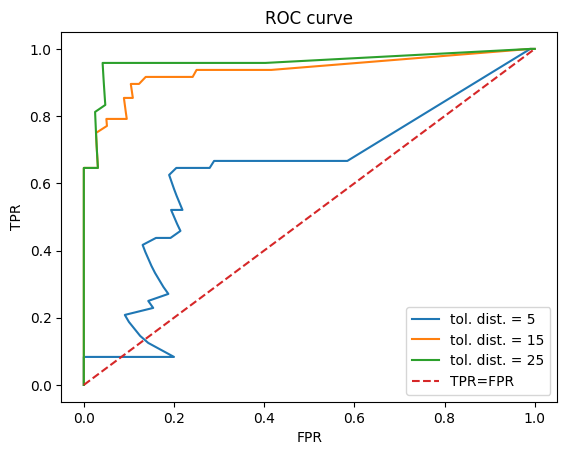

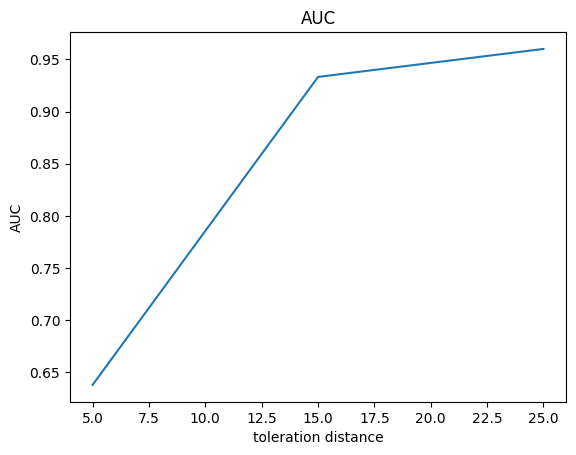

Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_37 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_72 (Dense)            (None, 3, 2)                 42        ['input_37[0][0]']            
                                                                                                  
 dense_73 (Dense)            (None, 3, 1)                 21        ['input_37[0][0]']            
                                                                                                  
 tf.concat_18 (TFOpLambda)   (None, 3, 3)                 0         ['dense_72[0][0]',            
                                                                     'dense_73[0][0]']     

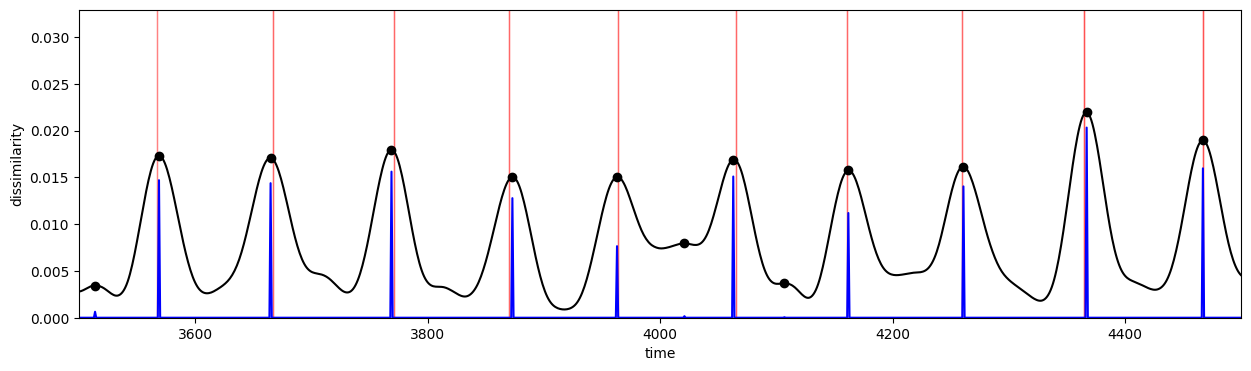

[0.6602848082217929, 0.9076811907417451, 0.956046101808179]


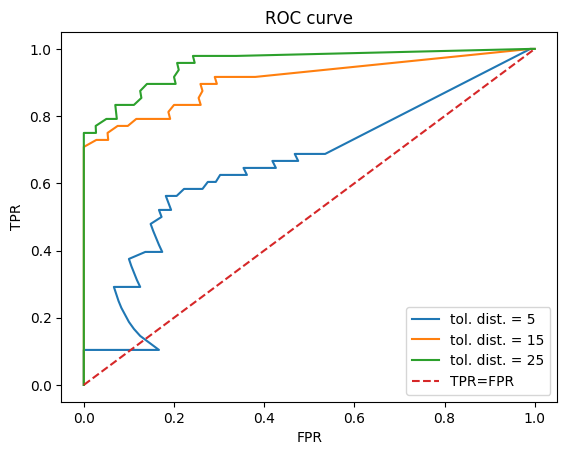

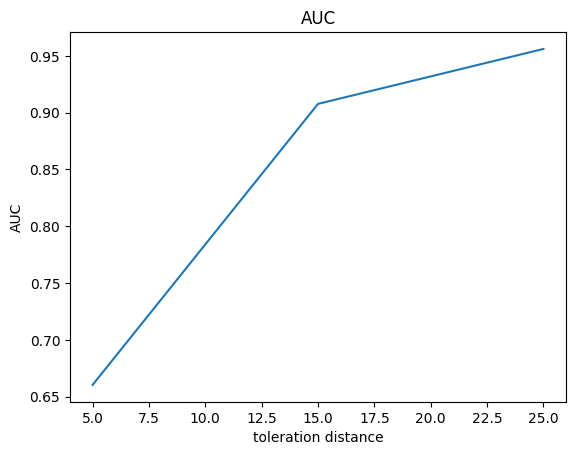

Model: "model_60"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_80 (Dense)            (None, 3, 2)                 42        ['input_41[0][0]']            
                                                                                                  
 dense_81 (Dense)            (None, 3, 1)                 21        ['input_41[0][0]']            
                                                                                                  
 tf.concat_20 (TFOpLambda)   (None, 3, 3)                 0         ['dense_80[0][0]',            
                                                                     'dense_81[0][0]']     

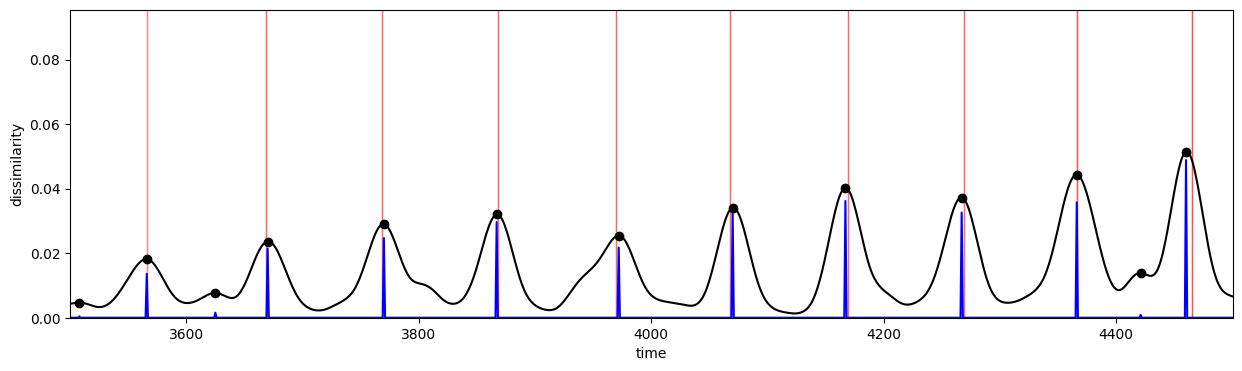

[0.6374428069624727, 0.8446039760313921, 0.9102667096477568]


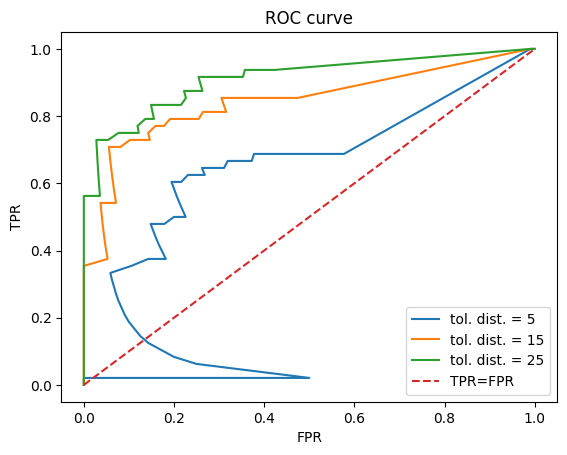

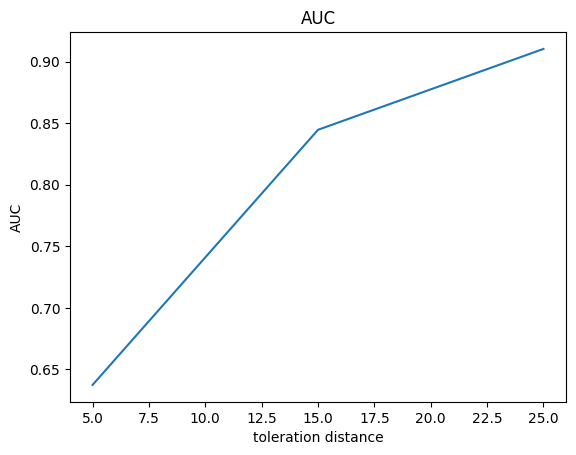

In [7]:
aucs = []
for i in range(10):
    timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
    windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
    shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
    shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)
    dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
    change_point_scores = TIRE.change_point_score(dissimilarities, window_size)
    utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

    tol_distances = [5,15,25]
    auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)
    aucs.append(auc)

In [8]:
import pandas as pd

In [9]:
s = pd.DataFrame(aucs)

In [10]:
s.mean()

0    0.555269
1    0.883362
2    0.925788
dtype: float64